In [2]:
# Importing necessary libraries

# NumPy is used for numerical operations and handling arrays
import numpy as np  

# Pandas is used for data manipulation and analysis (e.g., reading CSV, DataFrames)
import pandas as pd  

# Importing K-Nearest Neighbors Classifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier  

# Importing Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB  

# Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression  

# Importing Support Vector Classifier (SVM)
from sklearn.svm import SVC  

# Importing function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split  

# Importing function to generate a classification report (precision, recall, f1-score, etc.)
from sklearn.metrics import classification_report  


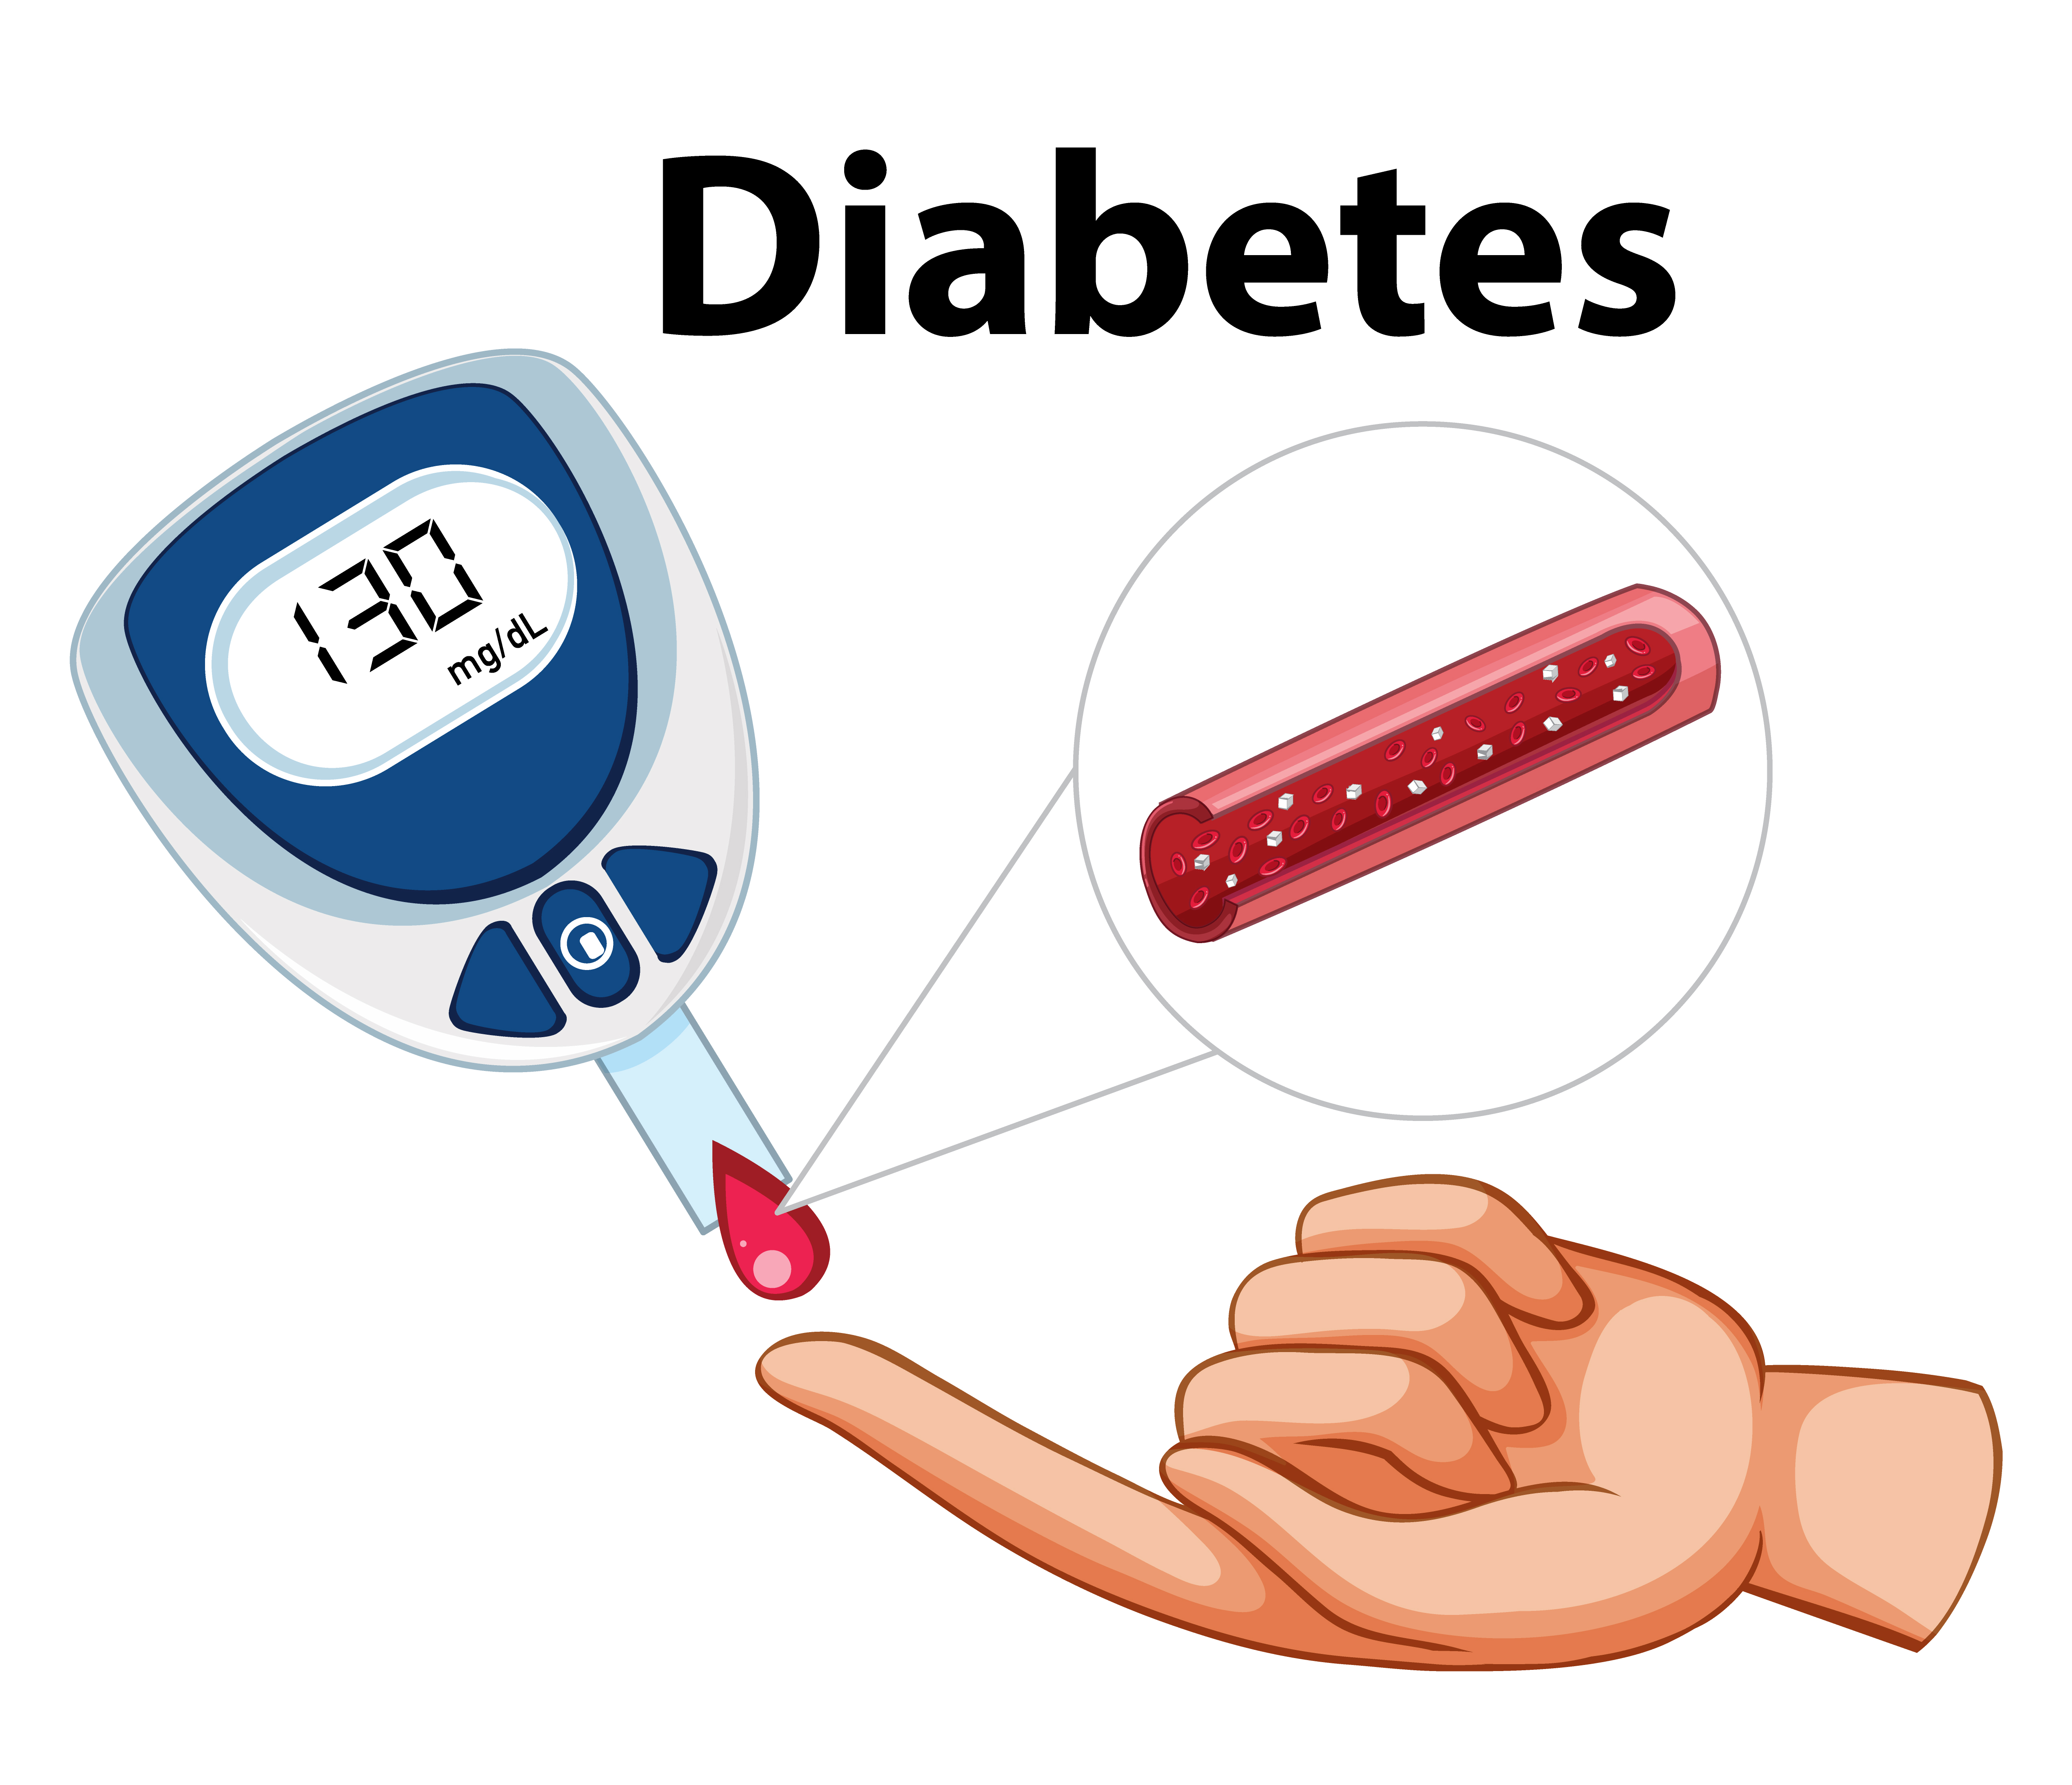

In [3]:
# Importing the Image and display functions from IPython.display
# These are used to show images directly inside Jupyter Notebook cells
from IPython.display import Image, display

# Displaying the image stored at the given file path
# 'filename' → specifies the path of the image file on your computer
# 'width=1000' → resizes the image to a width of 1000 pixels for better visibility
display(Image(filename="D:\\diabites.jpg", width=1000))


In [4]:
# Reading the dataset from a CSV file into a Pandas DataFrame
# 'pd.read_csv()' is used to load data from a CSV file
# The file path given here points to 'diabetes.csv' located in your OneDrive -> personal -> Documents folder
# The loaded data will be stored in a DataFrame named 'df'
df = pd.read_csv("OneDrive\\personal\\Documents\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
# Selecting the input (independent) and output (dependent) variables from the dataset

# 'x' will contain all the input features that help predict diabetes
# These columns represent medical measurements and patient information
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']]

# 'y' will contain the target/output variable — whether the person has diabetes or not
# The 'Outcome' column usually has 0 (no diabetes) and 1 (diabetic)
y = df['Outcome']


In [12]:
# Splitting the dataset into training and testing sets

# 'train_test_split()' randomly divides the data into two parts:
#  - Training set: used to train (fit) the machine learning model
#  - Testing set: used to evaluate how well the model performs on unseen data
#
# Parameters:
#  - x: feature variables (input data)
#  - y: target variable (output labels)
#  - test_size=0.2 → 20% of the data will be used for testing, and 80% for training
#  - random_state=23 → ensures that the split is the same every time you run the code (for reproducibility)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)


In [13]:
# Creating objects (instances) of different machine learning models

# 1️⃣ K-Nearest Neighbors (KNN) Classifier
# This model classifies a data point based on the majority class of its nearest neighbors.
knn_model = KNeighborsClassifier()

# 2️⃣ Gaussian Naive Bayes (NB) Classifier
# This model uses probability and assumes that features are normally distributed.
NB_model = GaussianNB()

# 3️⃣ Logistic Regression (LR)
# A linear model commonly used for binary classification problems (like diabetes: 0 or 1).
LR_model = LogisticRegression(max_iter=1000)

# 4️⃣ Support Vector Machine (SVM)
# This model finds the best hyperplane that separates the two classes with maximum margin.
SVM_model = SVC()


In [14]:
# Training (fitting) all the machine learning models using the training dataset

# 1️⃣ Train the K-Nearest Neighbors model
# The model learns the patterns and relationships between input features (x_train) and output labels (y_train)
knn_model.fit(x_train, y_train)

# 2️⃣ Train the Logistic Regression model
# Logistic Regression finds the best-fitting line (or boundary) to separate the two classes (0 = no diabetes, 1 = diabetes)
LR_model.fit(x_train, y_train)

# 3️⃣ Train the Gaussian Naive Bayes model
# Naive Bayes calculates probabilities for each class using Bayes’ theorem and assumes features are independent
NB_model.fit(x_train, y_train)

# 4️⃣ Train the Support Vector Machine model
# SVM finds the best hyperplane that maximizes the margin between the two classes in the data
SVM_model.fit(x_train, y_train)


SVC()

In [15]:
# Making predictions using the trained models on the test dataset

# 1️⃣ Predicting the outcomes using the K-Nearest Neighbors model
# The model predicts whether each patient in x_test is diabetic (1) or not (0)
y_pred_knn = knn_model.predict(x_test)

# 2️⃣ Predicting outcomes using the Gaussian Naive Bayes model
# This model outputs predictions based on the probability of each class
y_pred_NB = NB_model.predict(x_test)

# 3️⃣ Predicting outcomes using the Logistic Regression model
# Logistic Regression uses the learned coefficients to make binary predictions (0 or 1)
y_pred_LR = LR_model.predict(x_test)

# 4️⃣ Predicting outcomes using the Support Vector Machine model
# SVM classifies test samples based on which side of the hyperplane they fall on
y_pred_SVM = SVM_model.predict(x_test)


In [16]:
# Evaluating the performance of all models using classification reports

# The classification report shows key metrics:
#  - Precision: accuracy of positive predictions
#  - Recall: how many actual positives were correctly identified
#  - F1-score: harmonic mean of precision and recall
#  - Support: number of actual occurrences of each class in y_test

# 1️⃣ Evaluation for K-Nearest Neighbors model
print("KNN model")
print(classification_report(y_test, y_pred_knn))

print("----------------------------------------------------------------------")

# 2️⃣ Evaluation for Naive Bayes model
print("Naive Bayes model")
print(classification_report(y_test, y_pred_NB))

print("----------------------------------------------------------------------")

# 3️⃣ Evaluation for Logistic Regression model
print("Logistic Regression model")
print(classification_report(y_test, y_pred_LR))

print("----------------------------------------------------------------------")

# 4️⃣ Evaluation for Support Vector Machine model
print("SVM model")
print(classification_report(y_test, y_pred_SVM))


KNN model
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       101
           1       0.67      0.64      0.65        53

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

----------------------------------------------------------------------
Naive Bayes model
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       101
           1       0.71      0.74      0.72        53

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154

----------------------------------------------------------------------
Logistic Regression model
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       101
           1       0.76      0.64      0.

In [ ]:
# store the model in a file
with open("best_model.pkl","wb") as f:
    pickle.dump(LR_model,f)